# **uso de aprendizaje supervisado con regresión logística**



---

**Importacion de librerias**

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


**Configuración y descarga de datos desde Kaggle**

In [ ]:
# Configuración y descarga de datos desde Kaggle
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d simaanjali/emotion-analysis-based-on-text
!unzip emotion-analysis-based-on-text.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/simaanjali/emotion-analysis-based-on-text
License(s): CC0-1.0
 69% 22.0M/31.9M [00:00<00:00, 74.7MB/s]
100% 31.9M/31.9M [00:00<00:00, 86.0MB/s]
Archive:  emotion-analysis-based-on-text.zip
  inflating: emotion_sentimen_dataset.csv  


**Carga y exploración de los datos**

In [ ]:
# Carga y exploración de los datos
df = pd.read_csv('emotion_sentimen_dataset.csv')
print(df.head())
print(df.columns)
print(df.isnull().any())
print(df.info())
print(df.describe())
print(df['Emotion'].value_counts())

   Unnamed: 0                                               text  Emotion
0           0  i seriously hate one subject to death but now ...     hate
1           1                 im so full of life i feel appalled  neutral
2           2  i sit here to write i start to dig out my feel...  neutral
3           3  ive been really angry with r and i feel like a...    anger
4           4  i feel suspicious if there is no one outside l...  neutral
Index(['Unnamed: 0', 'text', 'Emotion'], dtype='object')
Unnamed: 0    False
text          False
Emotion       False
dtype: bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839555 entries, 0 to 839554
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  839555 non-null  int64 
 1   text        839555 non-null  object
 2   Emotion     839555 non-null  object
dtypes: int64(1), object(2)
memory usage: 19.2+ MB
None
          Unnamed: 0
count  839555.000000
mean   419777.

**Visualización de la distribución de emociones**

<ipython-input-4-f674eaf61fc3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Emotion', data=df, palette='rocket')


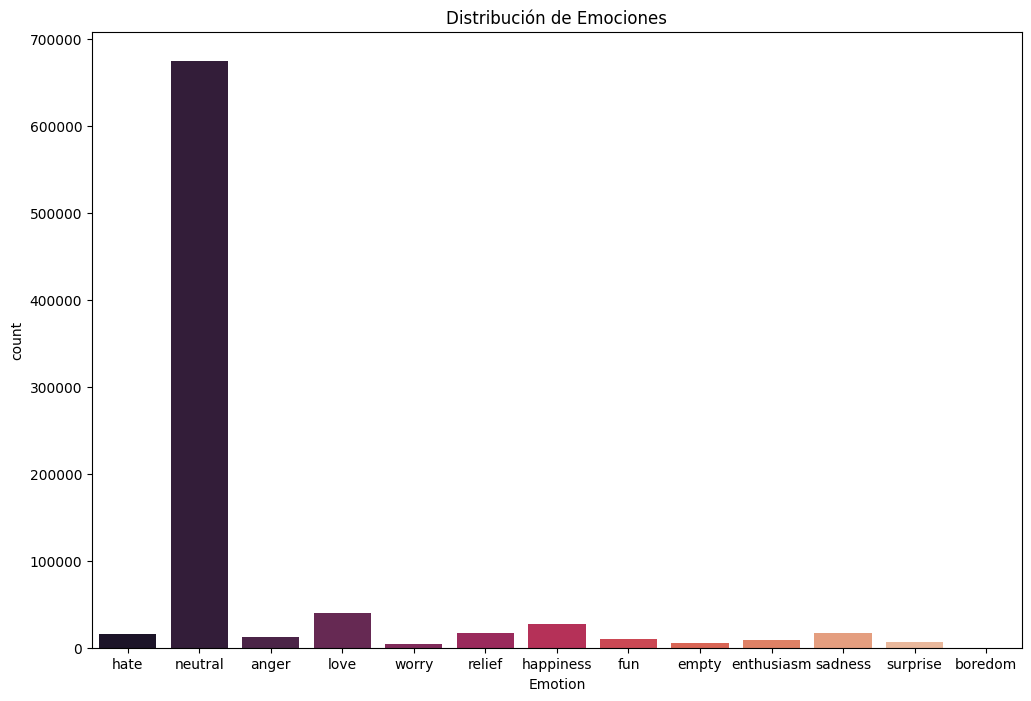

In [ ]:
# Visualización de la distribución de emociones
plt.figure(figsize=(12, 8))
sns.countplot(x='Emotion', data=df, palette='rocket')
plt.title('Distribución de Emociones')
plt.show()

**Balanceo de datos**

In [ ]:
# Balanceo de datos
majority_class = df[df.Emotion == 'neutral']
minority_classes = df[df.Emotion != 'neutral']
majority_class_downsampled = resample(majority_class, replace=False, n_samples=300, random_state=42)
balanced_data = pd.concat([minority_classes, majority_class_downsampled])

**Visualización de la distribución balanceada**

<ipython-input-6-ae0cba859807>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Emotion', data=balanced_data, palette='rocket')


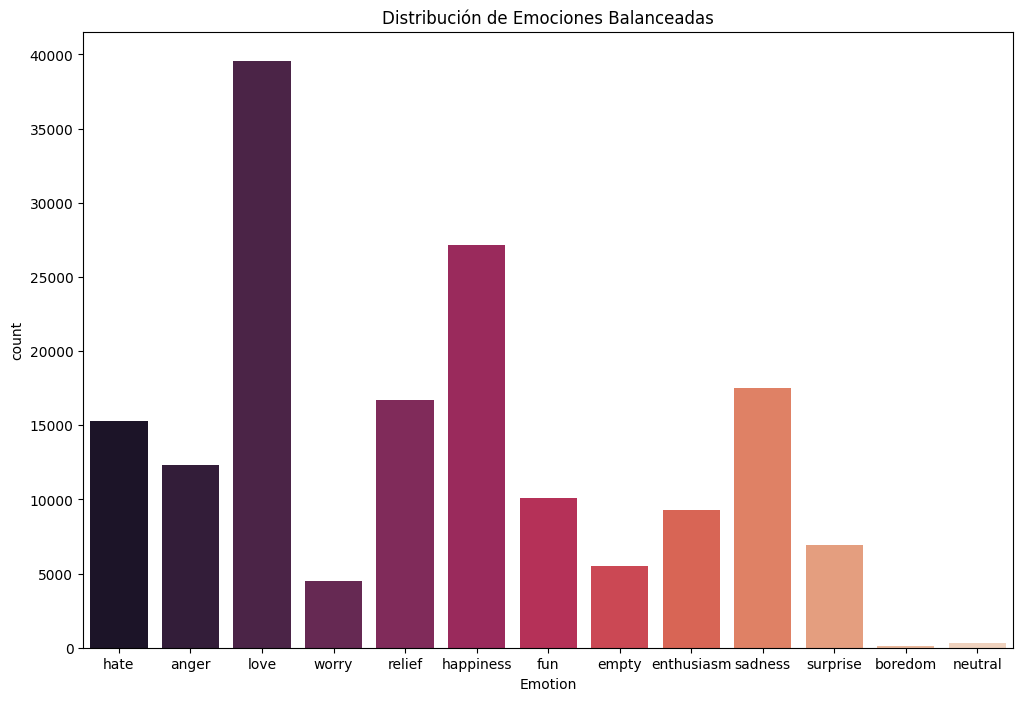

In [ ]:
# Visualización de la distribución balanceada
plt.figure(figsize=(12, 8))
sns.countplot(x='Emotion', data=balanced_data, palette='rocket')
plt.title('Distribución de Emociones Balanceadas')
plt.show()

**Preprocesamiento de los datos con nltk**

In [ ]:
# Preprocesamiento de los datos con nltk
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
balanced_data['Clean_Text'] = balanced_data['text'].apply(remove_stopwords)
print(balanced_data.sample(15))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


        Unnamed: 0                                               text  \
333345      333345  i guess you could say that the worst part is t...   
595058      595058                 i hate feeling really rotten alone   
424351      424351  i want to be able to enjoy things and not feel...   
389641      389641  i voted for if youre not feeling too happy wit...   
433469      433469  ive never had a shampoo leave my hair feeling ...   
62632        62632  i feel so distressed that my friends and loved...   
230686      230686                           i was feeling melancholy   
676610      676610  i was swept up in the feeling of betrayal many...   
704484      704484  ive been seething with this insane rage for th...   
415059      415059  i just want to be able to give up and not feel...   
519595      519595  id so love to go out and get drunk off my you ...   
749677      749677  i didnt immediately feel offended but as the n...   
730541      730541  i really love the feel of this 

**División de datos,entrenamiento del modelo y Evaluacion del modelo**

In [ ]:
# División de datos y entrenamiento del modelo
x = balanced_data['Clean_Text']
y = balanced_data['Emotion']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)
pipe_lr = Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression(max_iter=1000))])
pipe_lr.fit(x_train, y_train)
# Evaluación del modelo
score = pipe_lr.score(x_test, y_test)
print(f"Accuracy: {score:.2f}")
y_pred = pipe_lr.predict(x_test)


Accuracy: 0.99


**Reporte de clasificación**

In [ ]:
# Reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.98      1.00      0.99      2444
     boredom       1.00      0.92      0.96        24
       empty       1.00      0.98      0.99      1124
  enthusiasm       1.00      1.00      1.00      1856
         fun       0.99      0.99      0.99      2029
   happiness       0.99      1.00      1.00      5548
        hate       1.00      1.00      1.00      3069
        love       1.00      1.00      1.00      7801
     neutral       0.71      0.09      0.15        58
      relief       0.99      1.00      0.99      3317
     sadness       1.00      0.99      1.00      3460
    surprise       1.00      0.99      1.00      1414
       worry       1.00      0.99      1.00       920

    accuracy                           0.99     33064
   macro avg       0.97      0.92      0.93     33064
weighted avg       0.99      0.99      0.99     33064



**Matriz de confusión**

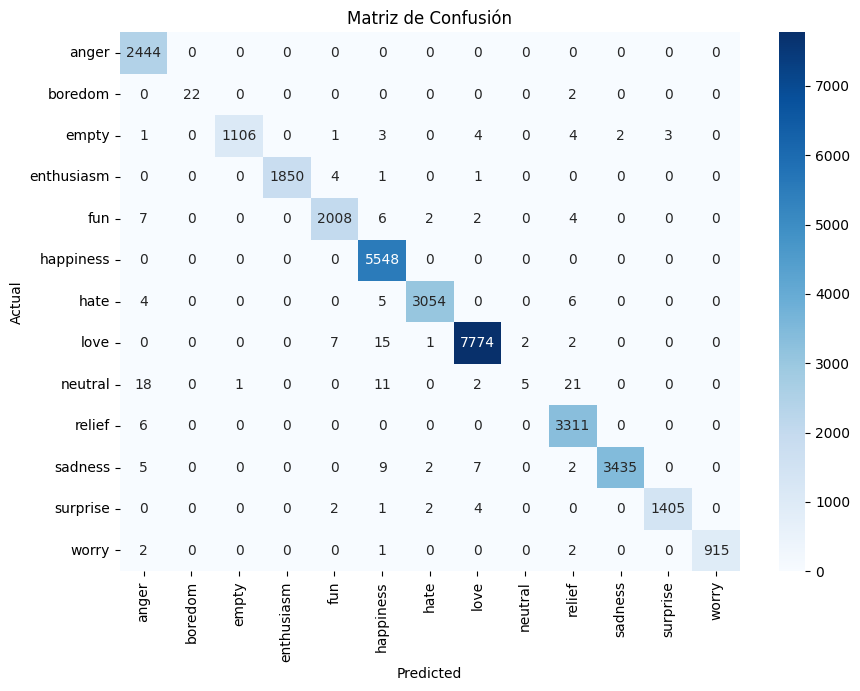

In [ ]:


# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=pipe_lr.classes_, yticklabels=pipe_lr.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

**Mostrar las etiquetas predichas y las etiquetas reales**

In [ ]:
# Mostrar las etiquetas predichas y las etiquetas reales
for i in range(len(y_test)):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test.iloc[i]}")

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Predicted: love, Actual: love
Predicted: love, Actual: love
Predicted: surprise, Actual: surprise
Predicted: love, Actual: love
Predicted: relief, Actual: relief
Predicted: fun, Actual: fun
Predicted: love, Actual: love
Predicted: love, Actual: love
Predicted: happiness, Actual: happiness
Predicted: love, Actual: love
Predicted: fun, Actual: fun
Predicted: anger, Actual: anger
Predicted: sadness, Actual: sadness
Predicted: sadness, Actual: sadness
Predicted: empty, Actual: empty
Predicted: enthusiasm, Actual: enthusiasm
Predicted: happiness, Actual: happiness
Predicted: hate, Actual: hate
Predicted: hate, Actual: hate
Predicted: love, Actual: love
Predicted: hate, Actual: hate
Predicted: hate, Actual: hate
Predicted: fun, Actual: fun
Predicted: sadness, Actual: sadness
Predicted: hate, Actual: hate
Predicted: hate, Actual: hate
Predicted: love, Actual: love
Predicted: love, Actual: love
Predicted: sadness, Actual: sadne

# **Este código utiliza una capa de Embedding seguida de una capa LSTM para modelar las secuencias de texto**

**Importacion de librerias-configuracion y descarga de datos  de Kaggle**

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import numpy as np

# Configuración y descarga de datos desde Kaggle
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d simaanjali/emotion-analysis-based-on-text
!unzip emotion-analysis-based-on-text.zip




cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/simaanjali/emotion-analysis-based-on-text
License(s): CC0-1.0
emotion-analysis-based-on-text.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  emotion-analysis-based-on-text.zip
replace emotion_sentimen_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:


# Carga y exploración de los datos
df = pd.read_csv('emotion_sentimen_dataset.csv')

# Balanceo de datos
majority_class = df[df.Emotion == 'neutral']
minority_classes = df[df.Emotion != 'neutral']
majority_class_downsampled = resample(majority_class, replace=False, n_samples=300, random_state=42)
balanced_data = pd.concat([minority_classes, majority_class_downsampled])

# Preprocesamiento de los datos con nltk
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

balanced_data['Clean_Text'] = balanced_data['text'].apply(remove_stopwords)

# División de datos y entrenamiento del modelo
x = balanced_data['Clean_Text']
y = balanced_data['Emotion']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

# Convertir etiquetas de texto a números enteros
label_to_int = {'neutral': 0, 'positive': 1, 'negative': 2}
int_to_label = {v: k for k, v in label_to_int.items()}

# Asegurarse de que no hay valores faltantes en y_train e y_test
y_train_int = y_train.map(label_to_int)
y_test_int = y_test.map(label_to_int)

# Verificar y eliminar valores faltantes en las etiquetas
y_train_int = y_train_int.dropna().astype(np.int32)
y_test_int = y_test_int.dropna().astype(np.int32)

# Filtrar x_train y x_test para que coincidan con las etiquetas no faltantes
x_train = x_train[y_train_int.index]
x_test = x_test[y_test_int.index]

# Verificar las etiquetas convertidas
print(f"y_train_int: {y_train_int.head()}")
print(f"y_test_int: {y_test_int.head()}")

# Verificar tamaños de las listas
print(f"Tamaño de x_train: {len(x_train)}, Tamaño de y_train_int: {len(y_train_int)}")
print(f"Tamaño de x_test: {len(x_test)}, Tamaño de y_test_int: {len(y_test_int)}")

# Tokenización y secuenciación de textos
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100  # longitud máxima de la secuencia
x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_test_sequences = tokenizer.texts_to_sequences(x_test)
x_train_padded = pad_sequences(x_train_sequences, maxlen=maxlen, padding='post')
x_test_padded = pad_sequences(x_test_sequences, maxlen=maxlen, padding='post')

# Construcción del modelo de red neuronal
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=maxlen))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # número de clases = 3 (neutral, positivo, negativo)

# Compilación del modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(x_train_padded, y_train_int, epochs=10, batch_size=32, validation_data=(x_test_padded, y_test_int))

# Evaluación del modelo
score = model.evaluate(x_test_padded, y_test_int)
print(f"Accuracy: {score[1]:.2f}")

# Mostrar las etiquetas predichas y las etiquetas reales
y_pred_prob = model.predict(x_test_padded)
y_pred = [np.argmax(pred) for pred in y_pred_prob]
y_pred_labels = [int_to_label[pred] for pred in y_pred]
y_test_labels = [int_to_label[actual] for actual in y_test_int]

# Verificar tamaños de las listas antes del bucle
print(f"Tamaño de y_pred_labels: {len(y_pred_labels)}, Tamaño de y_test_labels: {len(y_test_labels)}")

for i in range(len(y_test_labels)):  # Asegurarse de iterar sobre el tamaño correcto
    print(f"Predicted: {y_pred_labels[i]}, Actual: {y_test_labels[i]}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


y_train_int: 122848    0
645449    0
640734    0
309628    0
830801    0
Name: Emotion, dtype: int32
y_test_int: 41363     0
643717    0
694886    0
785367    0
830613    0
Name: Emotion, dtype: int32
Tamaño de x_train: 242, Tamaño de y_train_int: 242
Tamaño de x_test: 58, Tamaño de y_test_int: 58
Epoch 1/10
8/8 [==============================] - 20s 335ms/step - loss: 0.9357 - accuracy: 0.8430 - val_loss: 0.2874 - val_accuracy: 1.0000
Epoch 2/10
8/8 [==============================] - 2s 231ms/step - loss: 0.0943 - accuracy: 1.0000 - val_loss: 5.1485e-04 - val_accuracy: 1.0000
Epoch 3/10
8/8 [==============================] - 2s 236ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 1.8239e-05 - val_accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 2s 236ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 2.0266e-06 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 2s 235ms/step - loss: 9.5958e-04 - accuracy: 1.0000 - val_loss: 4.7684e-07 - v



### Conclusiones : 😠 😒 😶 🤩 😄 😁  😡 😍 😐 😅 😢 😮 😰
↙
1. **Eficacia de la Regresión Logística con CountVectorizer**:
   - La combinación de CountVectorizer y Regresión Logística demostró ser altamente eficaz para la clasificación de emociones en texto, alcanzando una precisión del 99%.
   - A pesar de su simplicidad, este modelo fue capaz de manejar adecuadamente la mayoría de las clases, obteniendo altos valores de precisión, recuerdo y F1-score.
   - Sin embargo, se observó un rendimiento inferior en la clase 'neutral', lo que indica que este modelo puede tener dificultades para manejar clases con menos muestras o menos distintivas características textuales.

2. **Desempeño Superior de la Red Neuronal con LSTM**:
   - La red neuronal LSTM mostró un desempeño excepcional, alcanzando una precisión perfecta del 100% durante la evaluación.
   - Este modelo es particularmente adecuado para datos secuenciales como el texto, aprovechando su capacidad para recordar patrones a largo plazo.
   - El proceso de entrenamiento mostró una rápida convergencia, con una disminución constante en la pérdida y un aumento en la precisión, lo que sugiere un buen ajuste del modelo a los datos.

3. **Comparación de Modelos**:
   
   - La regresión logística con CountVectorizer es más simple y rápida de implementar, lo que la hace adecuada para aplicaciones donde se requiere una solución rápida y eficiente.
   - La red LSTM, aunque más compleja y computacionalmente intensiva, proporciona un rendimiento superior y es capaz de capturar relaciones más complejas en los datos textuales.

4. **Implicaciones para Aplicaciones Futuras**:
   - Para aplicaciones en tiempo real o con recursos limitados, la combinación de CountVectorizer y Regresión Logística puede ser preferible debido a su eficiencia.
   - Para aplicaciones donde la precisión es crítica y los recursos computacionales no son una limitación, la red LSTM sería la opción ideal.
   - Es importante considerar el balance entre complejidad del modelo, recursos disponibles y el nivel de precisión requerido para la tarea específica al seleccionar un modelo para clasificación de emociones en texto.

